In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from scipy.stats import chi2
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Globally fix plot styling
mpl.rc('xtick', direction='out', top=True)
mpl.rc('ytick', direction='out', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

from mpl_toolkits.axes_grid1 import make_axes_locatable

## variables to set up the map plots
mult = 1
N = 2**10*mult #cs.N # this is the number of pixels in a linear dimension
         ## since we are using lots of FFTs this should be a factor of 2^N
c_min = -400 #cs.c_min # minimum for color bar
c_max = 400#cs.c_max # maximum for color bar
pix_size = 0.5 #cs.pix_size # size of a pixel in arcminutes
X_width = N*pix_size/60. #cs.X_width # horizontal map width in degrees
Y_width = N*pix_size/60. #cs.Y_width # vertical map width in degrees


delta_ell = 50. #cs.delta_ell
ell_max = 5000. #cs.ell_max

In [ ]:
ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
ClTT[0] = 0. 
ClTT[1] = 0.
onesvec = np.ones(N)
inds  = (np.arange(N)+.5 - N/2.) /(N-1.) 
X = np.outer(onesvec,inds) 
Y = np.transpose(X)
R = np.sqrt(X**2. + Y**2.)
pix_to_rad = (pix_size/60. * np.pi/180.)
ell_scale_factor = 2. * np.pi /pix_to_rad
ell2d = R * ell_scale_factor 
ClTT_expanded = np.zeros(int(ell2d.max())+1) 
ClTT_expanded[0:(ClTT.size)] = ClTT    
CLTT2d = ClTT_expanded[ell2d.astype(int)]
random_array_for_T = np.random.normal(0,1,(N,N))
FT_random_array_for_T = np.fft.fftn(random_array_for_T)
FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T
CMB_T = np.fft.ifftn(np.fft.fftshift(FT_2d)) 
CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
CMB_T = np.real(CMB_T)

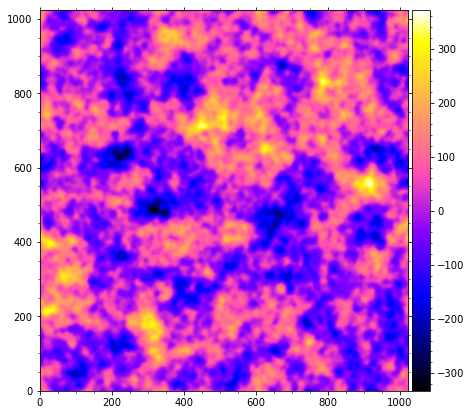

In [22]:
ell,DlTT,lTT2,lTT3,lTT4,lTT5 = np.loadtxt(f"CMBAnalysis_SummerSchool/CAMB_fiducial_cosmo_scalCls.dat",
                                            usecols=(0,1,2,3,4,5), unpack=True)
ClTT = DlTT * 2 * np.pi / (ell*(ell+1.))
ClTT[0] = 0. 
ClTT[1] = 0.
onesvec = np.ones(N)
inds  = (np.arange(N)+.5 - N/2.) /(N-1.) 
X = np.outer(onesvec,inds)
Y = np.transpose(X)
R = np.sqrt(X**2. + Y**2.)
pix_to_rad = (pix_size/60. * np.pi/180.)
ell_scale_factor = 2. * np.pi /pix_to_rad
ell2d = R * ell_scale_factor
ClTT_expanded = np.zeros(int(ell2d.max())+1)
ClTT_expanded[0:(ClTT.size)] = ClTT
CLTT2d = ClTT_expanded[ell2d.astype(int)]
random_array_for_T = np.random.normal(0,1,(N,N))
FT_random_array_for_T = np.fft.fftn(random_array_for_T)
FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T
CMB_T = np.fft.ifftn(np.fft.fftshift(FT_2d))
CMB_T = CMB_T/(pix_size /60.* np.pi/180.)

fig = plt.figure(figsize=(7,7));
ax = fig.add_subplot(111);
im = ax.imshow(np.real(CMB_T), interpolation='bilinear',origin='lower',aspect='auto',cmap=cm.gnuplot2)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax),
# ax.plot(FT_random_array_for_T);

In [161]:
1/(pix_size /60.* np.pi/180.)

6875.493541569879